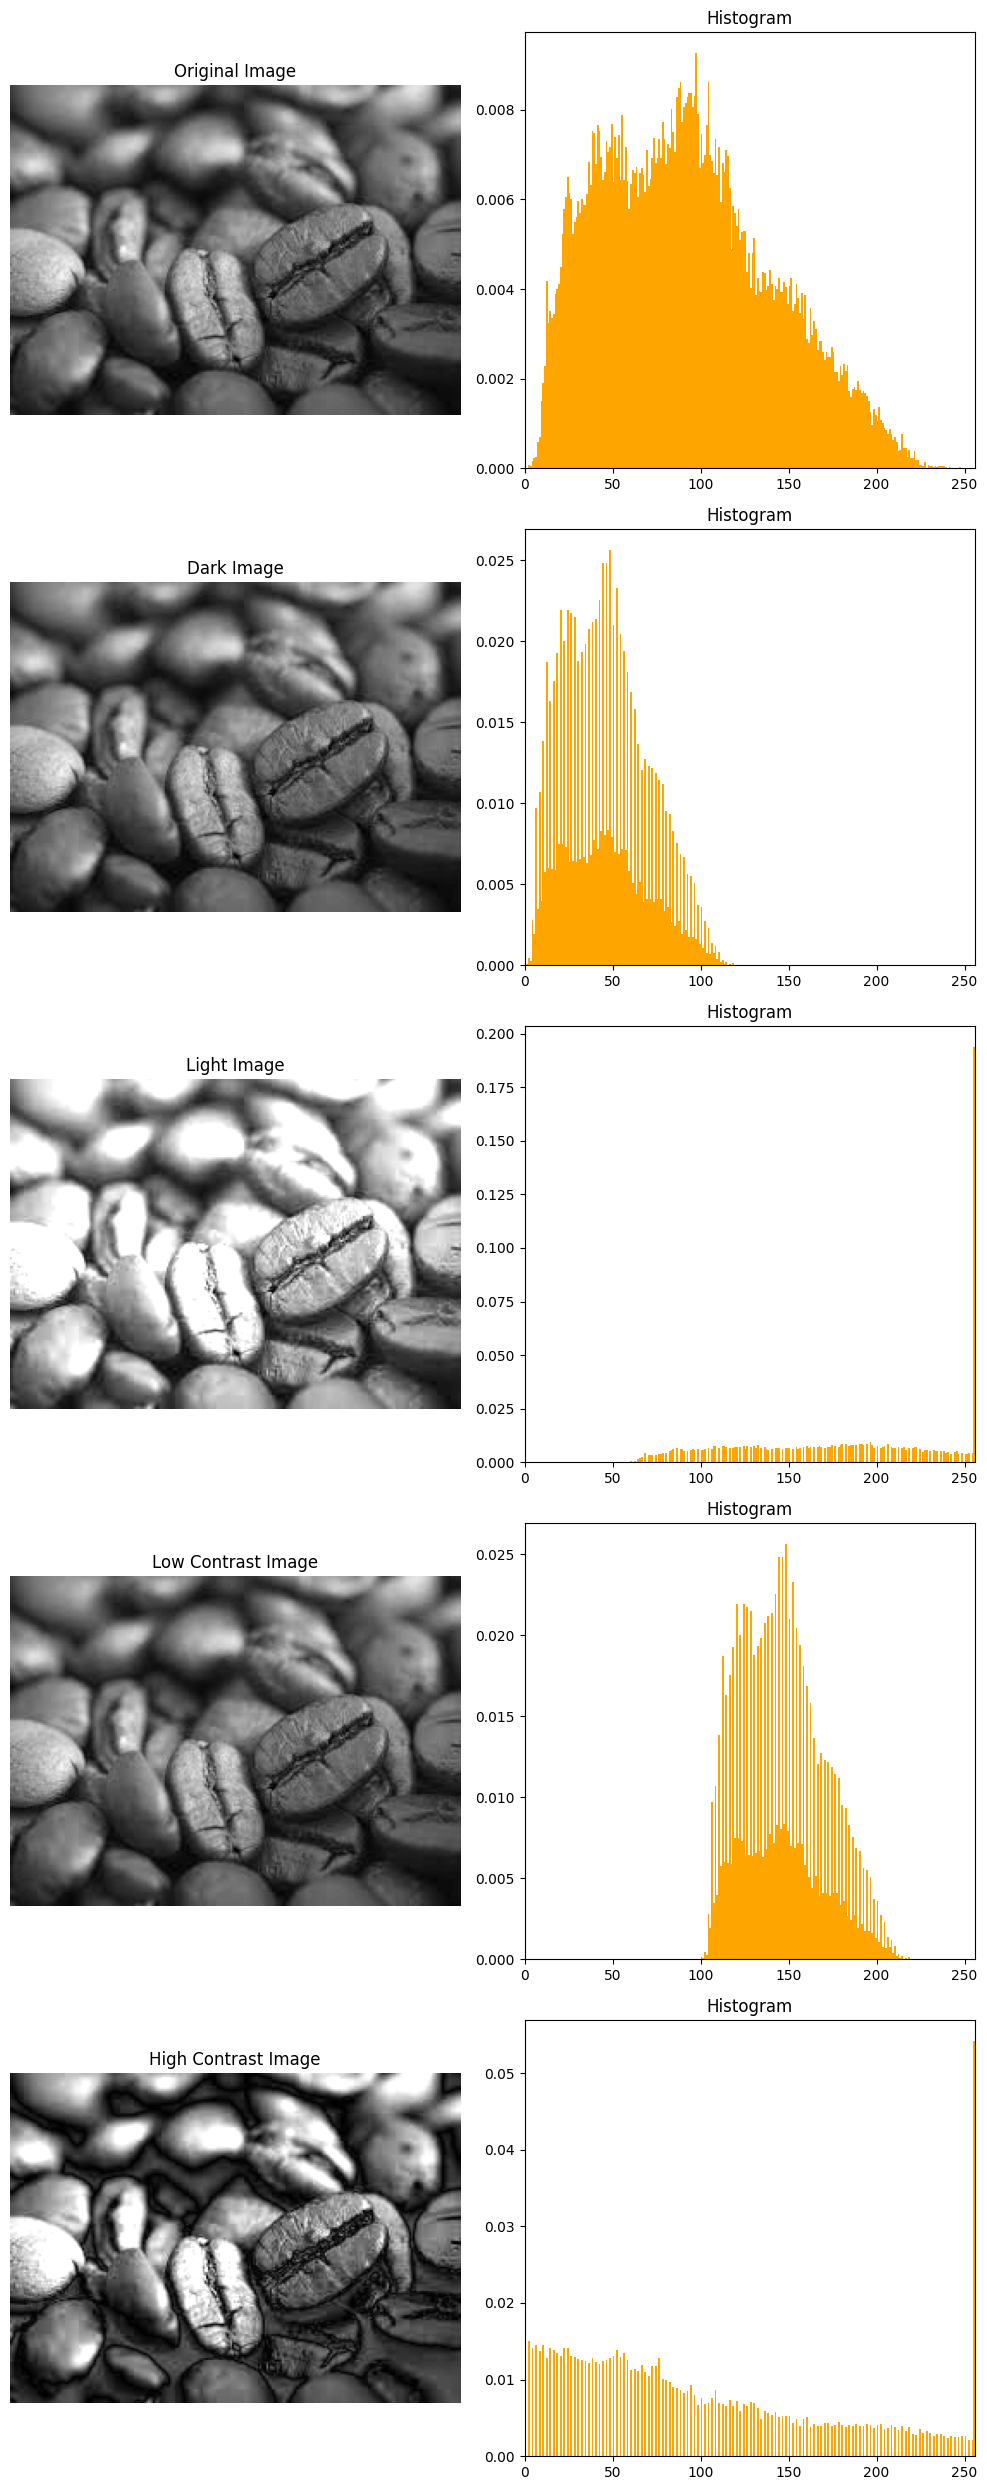

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Function to read an image and convert it to grayscale
def read_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    return image

# Path to your input image
input_image_path = 'coffee.jpeg'

# Read the input image
input_image = read_image(input_image_path)

# Function to create variations of the input image
def create_variations(image):
    dark_image = cv2.convertScaleAbs(image, alpha=0.5, beta=0)  # Darker version
    light_image = cv2.convertScaleAbs(image, alpha=1.5, beta=50)  # Lighter version
    low_contrast_image = cv2.convertScaleAbs(image, alpha=0.5, beta=100)  # Low contrast version
    high_contrast_image = cv2.convertScaleAbs(image, alpha=2.0, beta=-100)  # High contrast version
    return dark_image, light_image, low_contrast_image, high_contrast_image

# Create image variations
dark_image, light_image, low_contrast_image, high_contrast_image = create_variations(input_image)

# Function to plot image and histogram
def plot_image_and_histogram(image, title, ax_img, ax_hist):
    ax_img.imshow(image, cmap='gray')
    ax_img.axis('off')
    ax_img.set_title(title)
    
    ax_hist.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='orange')
    ax_hist.set_xlim([0, 256])
    ax_hist.set_title('Histogram')

# Create subplots
fig, axs = plt.subplots(5, 2, figsize=(10, 25))

# Plot original image and its histogram
plot_image_and_histogram(input_image, 'Original Image', axs[0, 0], axs[0, 1])

# Plot each variation and its histogram
plot_image_and_histogram(dark_image, 'Dark Image', axs[1, 0], axs[1, 1])
plot_image_and_histogram(light_image, 'Light Image', axs[2, 0], axs[2, 1])
plot_image_and_histogram(low_contrast_image, 'Low Contrast Image', axs[3, 0], axs[3, 1])
plot_image_and_histogram(high_contrast_image, 'High Contrast Image', axs[4, 0], axs[4, 1])

plt.tight_layout()
plt.show()


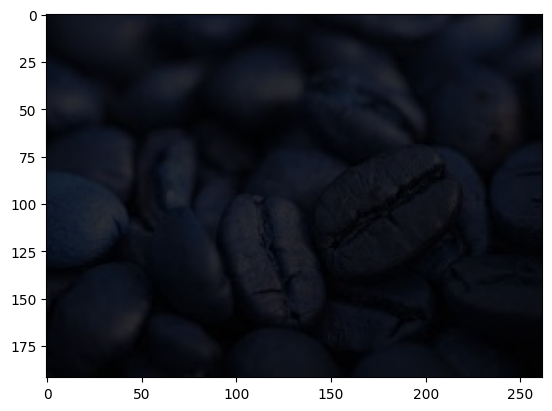

In [4]:
import cv2

# Load the image
image = cv2.imread('coffee.jpeg')

# Convert image to float32 to prevent overflow during processing
image = image.astype('float32')

# Define the factor to darken the image
factor = 0.2  # Adjust this value between 0 and 1

# Darken the image
darker_image = image * factor

# Clip values to be in the valid range [0, 255] and convert back to uint8
darker_image = np.clip(darker_image, 0, 255).astype('uint8')
# Save the result

plt.imshow(darker_image)

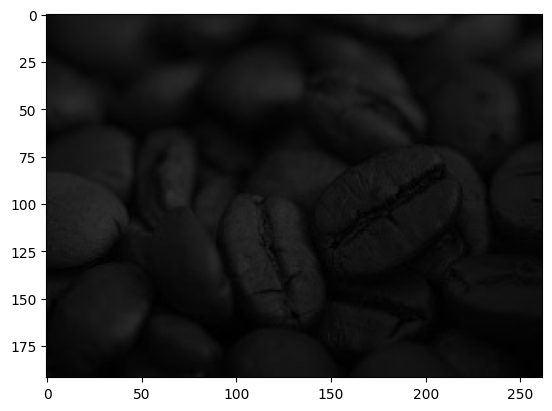

In [9]:
import cv2

image = cv2.imread('c2.jpeg')
image = image.astype('float32')
factor = 0.2 
darker_image = image * factor
darker_image = np.clip(darker_image, 0, 255).astype('uint8')
plt.imshow(darker_image)

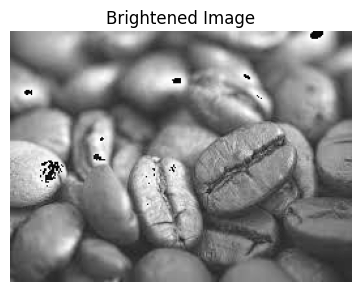

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('c2.jpeg', cv2.IMREAD_GRAYSCALE)


min_in = np.min(image)  # Minimum input pixel value
max_in = np.max(image)  # Maximum input pixel value
min_out = 0             # Minimum output pixel value (black)
max_out = 255           # Maximum output pixel value (white)

contrast_stretched = np.clip(((image - min_in) / (max_in - min_in)) * (max_out - min_out) + min_out, 0, 255).astype(np.uint8)

brightness_increase = 35  
bright_image = np.clip(contrast_stretched + brightness_increase, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 3)
plt.title('Brightened Image')
plt.imshow(bright_image, cmap='gray')
plt.axis('off')

plt.show()


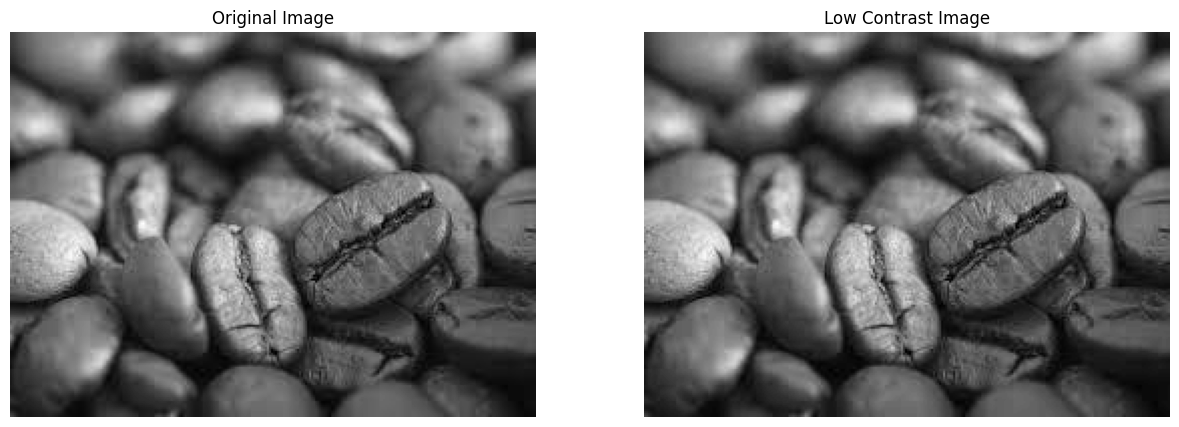

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the grayscale image
image = cv2.imread('c2.jpeg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded correctly
if image is None:
    raise ValueError("Image not loaded correctly. Please check the path.")

# Apply low contrast
min_in = np.min(image)  # Minimum input pixel value
max_in = np.max(image)  # Maximum input pixel value

# Define the new contrast range
min_out = 50          # Minimum output pixel value (light gray)
max_out = 150           # Maximum output pixel value (dark gray)

# Apply the low contrast transformation
low_contrast_image = np.clip(((image - min_in) / (max_in - min_in)) * (max_out - min_out) + min_out, 0, 255).astype(np.uint8)

# Display the images using Matplotlib
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Low contrast image
plt.subplot(1, 2, 2)
plt.title('Low Contrast Image')
plt.imshow(low_contrast_image, cmap='gray')
plt.axis('off')

plt.show()


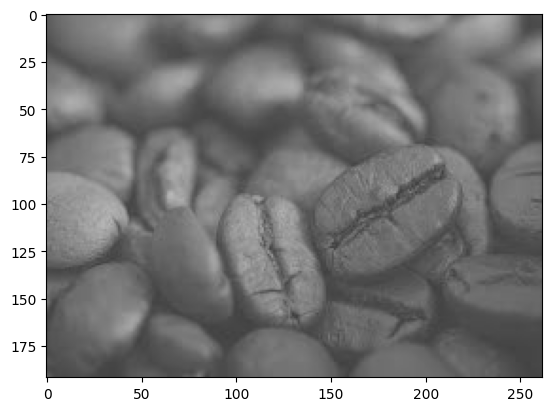

In [30]:
import cv2
import numpy as np

def reduce_contrast(img, alpha):
  """Reduces image contrast linearly.

  Args:
    img: Input image.
    alpha: Contrast scaling factor (0 < alpha < 1).

  Returns:
    Low contrast image.
  """

  # Convert to float32 to prevent overflow
  img = img.astype(np.float32)
  # Apply linear transformation
  img = alpha * img + (1 - alpha) * 128
  # Clip values to [0, 255]
  img = np.clip(img, 0, 255)
  # Convert back to uint8
  img = img.astype(np.uint8)
  return img

# Load image
img = cv2.imread('c2.jpeg')

# Reduce contrast (adjust alpha for desired effect)
low_contrast_img = reduce_contrast(img, 0.5)

# Display images
plt.imshow(img)
plt.imshow(low_contrast_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


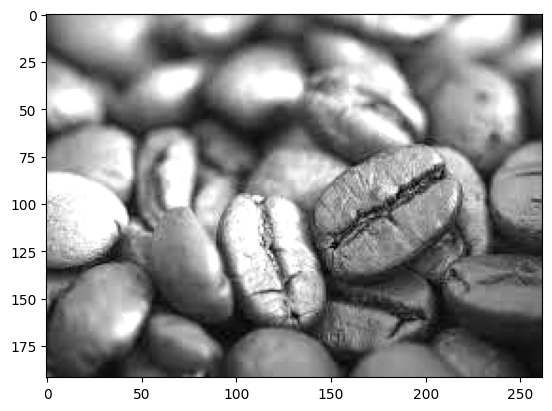

In [31]:
import cv2
import numpy as np

def increase_contrast(img, alpha, beta):
  """Increases image contrast linearly.

  Args:
    img: Input image.
    alpha: Contrast scaling factor (alpha > 1).
    beta: Brightness adjustment.

  Returns:
    High contrast image.
  """

  # Convert to float32 to prevent overflow
  img = img.astype(np.float32)
  # Apply linear transformation
  img = alpha * img + beta
  # Clip values to [0, 255]
  img = np.clip(img, 0, 255)
  # Convert back to uint8
  img = img.astype(np.uint8)
  return img

# Load image
img = cv2.imread('c2.jpeg')

# Increase contrast (adjust alpha and beta for desired effect)
high_contrast_img = increase_contrast(img, 1.5, 0)

# Display images
# cv2.imshow('Original', img)
plt.imshow(high_contrast_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()


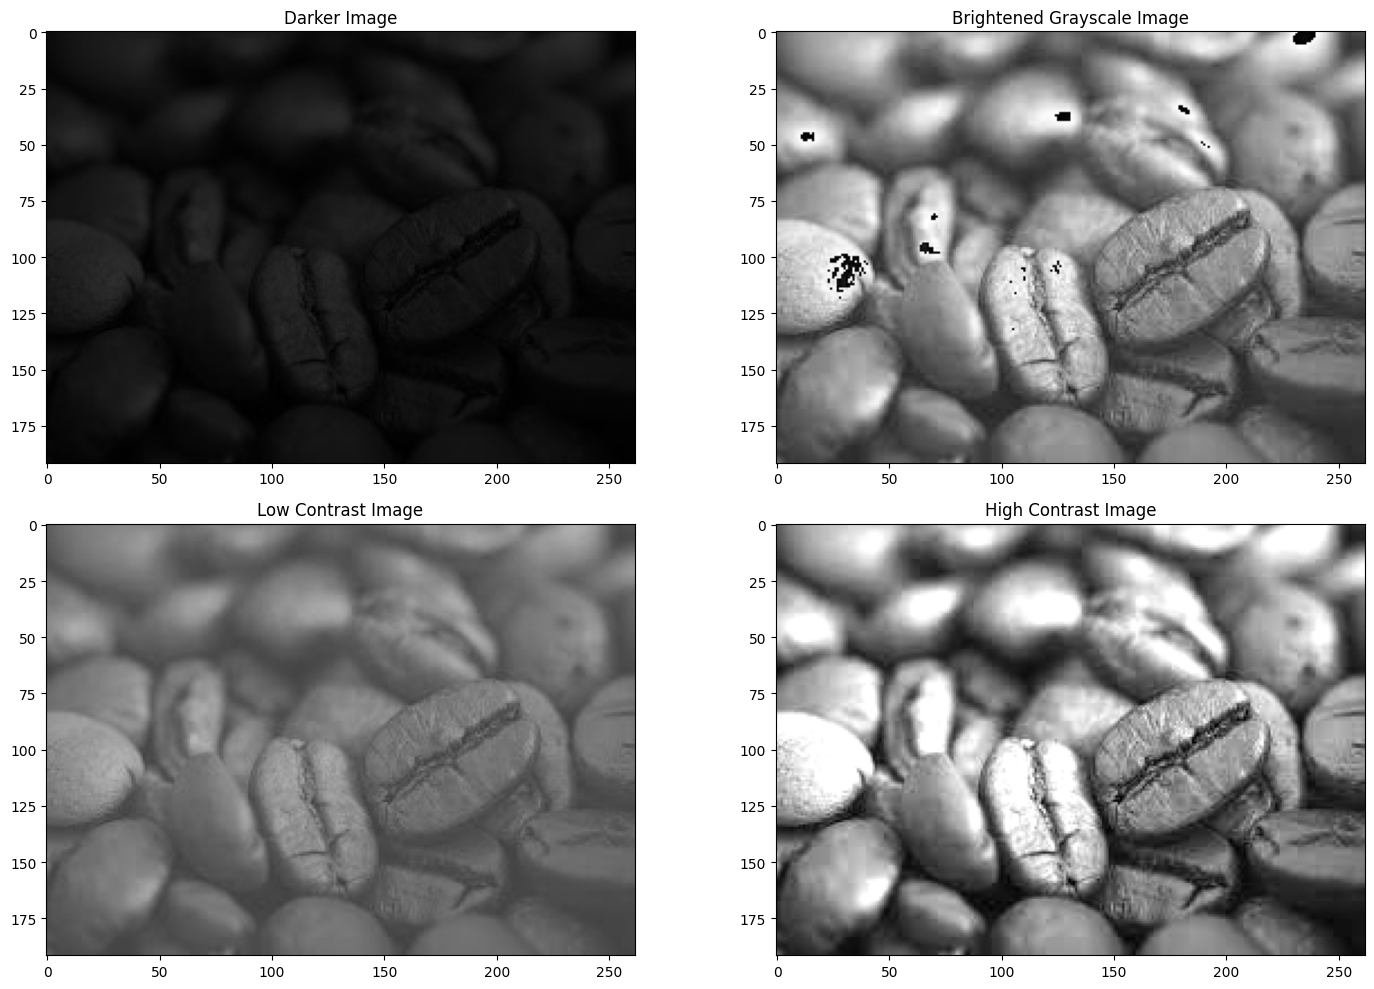

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to reduce image contrast
def reduce_contrast(img, alpha):
    img = img.astype(np.float32)
    img = alpha * img + (1 - alpha) * 128
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Function to increase image contrast
def increase_contrast(img, alpha, beta):
    img = img.astype(np.float32)
    img = alpha * img + beta
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Load and display the original image
img = cv2.imread('c2.jpeg')
plt.figure(figsize=(15, 10))

# Darker image
factor = 0.2
darker_image = np.clip(img.astype('float32') * factor, 0, 255).astype('uint8')
plt.subplot(2, 2, 1)
plt.title('Darker Image')
plt.imshow(cv2.cvtColor(darker_image, cv2.COLOR_BGR2RGB))

# Contrast stretching in grayscale
image_gray = cv2.imread('c2.jpeg', cv2.IMREAD_GRAYSCALE)
min_in, max_in = np.min(image_gray), np.max(image_gray)
contrast_stretched = np.clip(((image_gray - min_in) / (max_in - min_in)) * 255, 0, 255).astype(np.uint8)

# Increase brightness
brightness_increase = 35
bright_image = np.clip(contrast_stretched + brightness_increase, 0, 255).astype(np.uint8)
plt.subplot(2, 2, 2)
plt.title('Brightened Grayscale Image')
plt.imshow(bright_image, cmap='gray')

# Low contrast image
low_contrast_img = reduce_contrast(img, 0.5)
plt.subplot(2, 2, 3)
plt.title('Low Contrast Image')
plt.imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB))

# High contrast image
high_contrast_img = increase_contrast(img, 1.5, 0)
plt.subplot(2, 2, 4)
plt.title('High Contrast Image')
plt.imshow(cv2.cvtColor(high_contrast_img, cv2.COLOR_BGR2RGB))

# Display all images
plt.tight_layout()
plt.show()


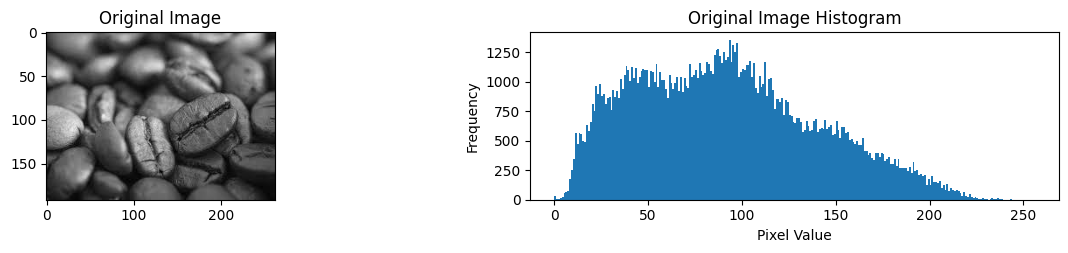

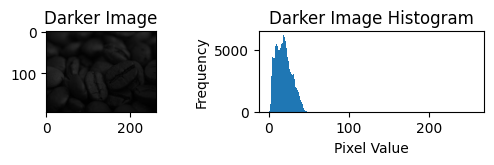

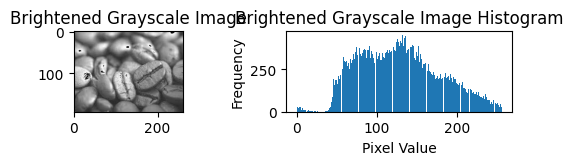

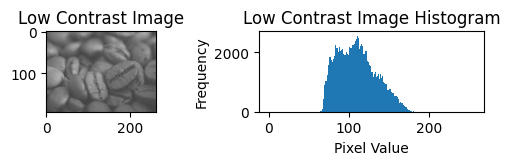

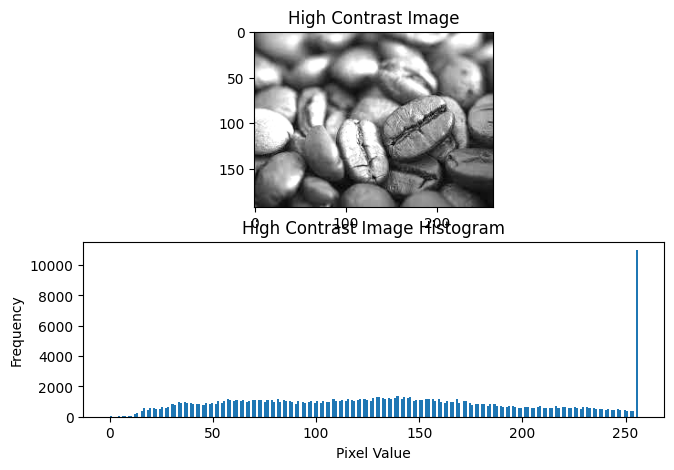

<Figure size 640x480 with 0 Axes>

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to reduce image contrast
def reduce_contrast(img, alpha):
    img = img.astype(np.float32)
    img = alpha * img + (1 - alpha) * 128
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Function to increase image contrast
def increase_contrast(img, alpha, beta):
    img = img.astype(np.float32)
    img = alpha * img + beta
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Function to plot histogram
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

# Load the original image
img = cv2.imread('c2.jpeg')

# Darker image
factor = 0.2
darker_image = np.clip(img.astype('float32') * factor, 0, 255).astype('uint8')

# Contrast stretching in grayscale
image_gray = cv2.imread('c2.jpeg', cv2.IMREAD_GRAYSCALE)
min_in, max_in = np.min(image_gray), np.max(image_gray)
contrast_stretched = np.clip(((image_gray - min_in) / (max_in - min_in)) * 255, 0, 255).astype(np.uint8)

# Increase brightness
brightness_increase = 35
bright_image = np.clip(contrast_stretched + brightness_increase, 0, 255).astype(np.uint8)

# Low contrast image
low_contrast_img = reduce_contrast(img, 0.5)

# High contrast image
high_contrast_img = increase_contrast(img, 1.5, 0)

# Display all images with histograms
plt.figure(figsize=(15, 10))

# Original image and histogram
plt.subplot(4, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(4, 2, 2)
plot_histogram(img, 'Original Image Histogram')

# Darker image and histogram
plt.subplot(4, 2, 3)
plt.title('Darker Image')
plt.imshow(cv2.cvtColor(darker_image, cv2.COLOR_BGR2RGB))
plt.subplot(4, 2, 4)
plot_histogram(darker_image, 'Darker Image Histogram')

# Brightened grayscale image and histogram
plt.subplot(4, 2, 5)
plt.title('Brightened Grayscale Image')
plt.imshow(bright_image, cmap='gray')
plt.subplot(4, 2, 6)
plot_histogram(bright_image, 'Brightened Grayscale Image Histogram')

# Low contrast image and histogram
plt.subplot(4, 2, 7)
plt.title('Low Contrast Image')
plt.imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB))
plt.subplot(4, 2, 8)
plot_histogram(low_contrast_img, 'Low Contrast Image Histogram')

# High contrast image and histogram
plt.figure(figsize=(7.5, 5))
plt.subplot(2, 1, 1)
plt.title('High Contrast Image')
plt.imshow(cv2.cvtColor(high_contrast_img, cv2.COLOR_BGR2RGB))
plt.subplot(2, 1, 2)
plot_histogram(high_contrast_img, 'High Contrast Image Histogram')

plt.tight_layout()
plt.show()


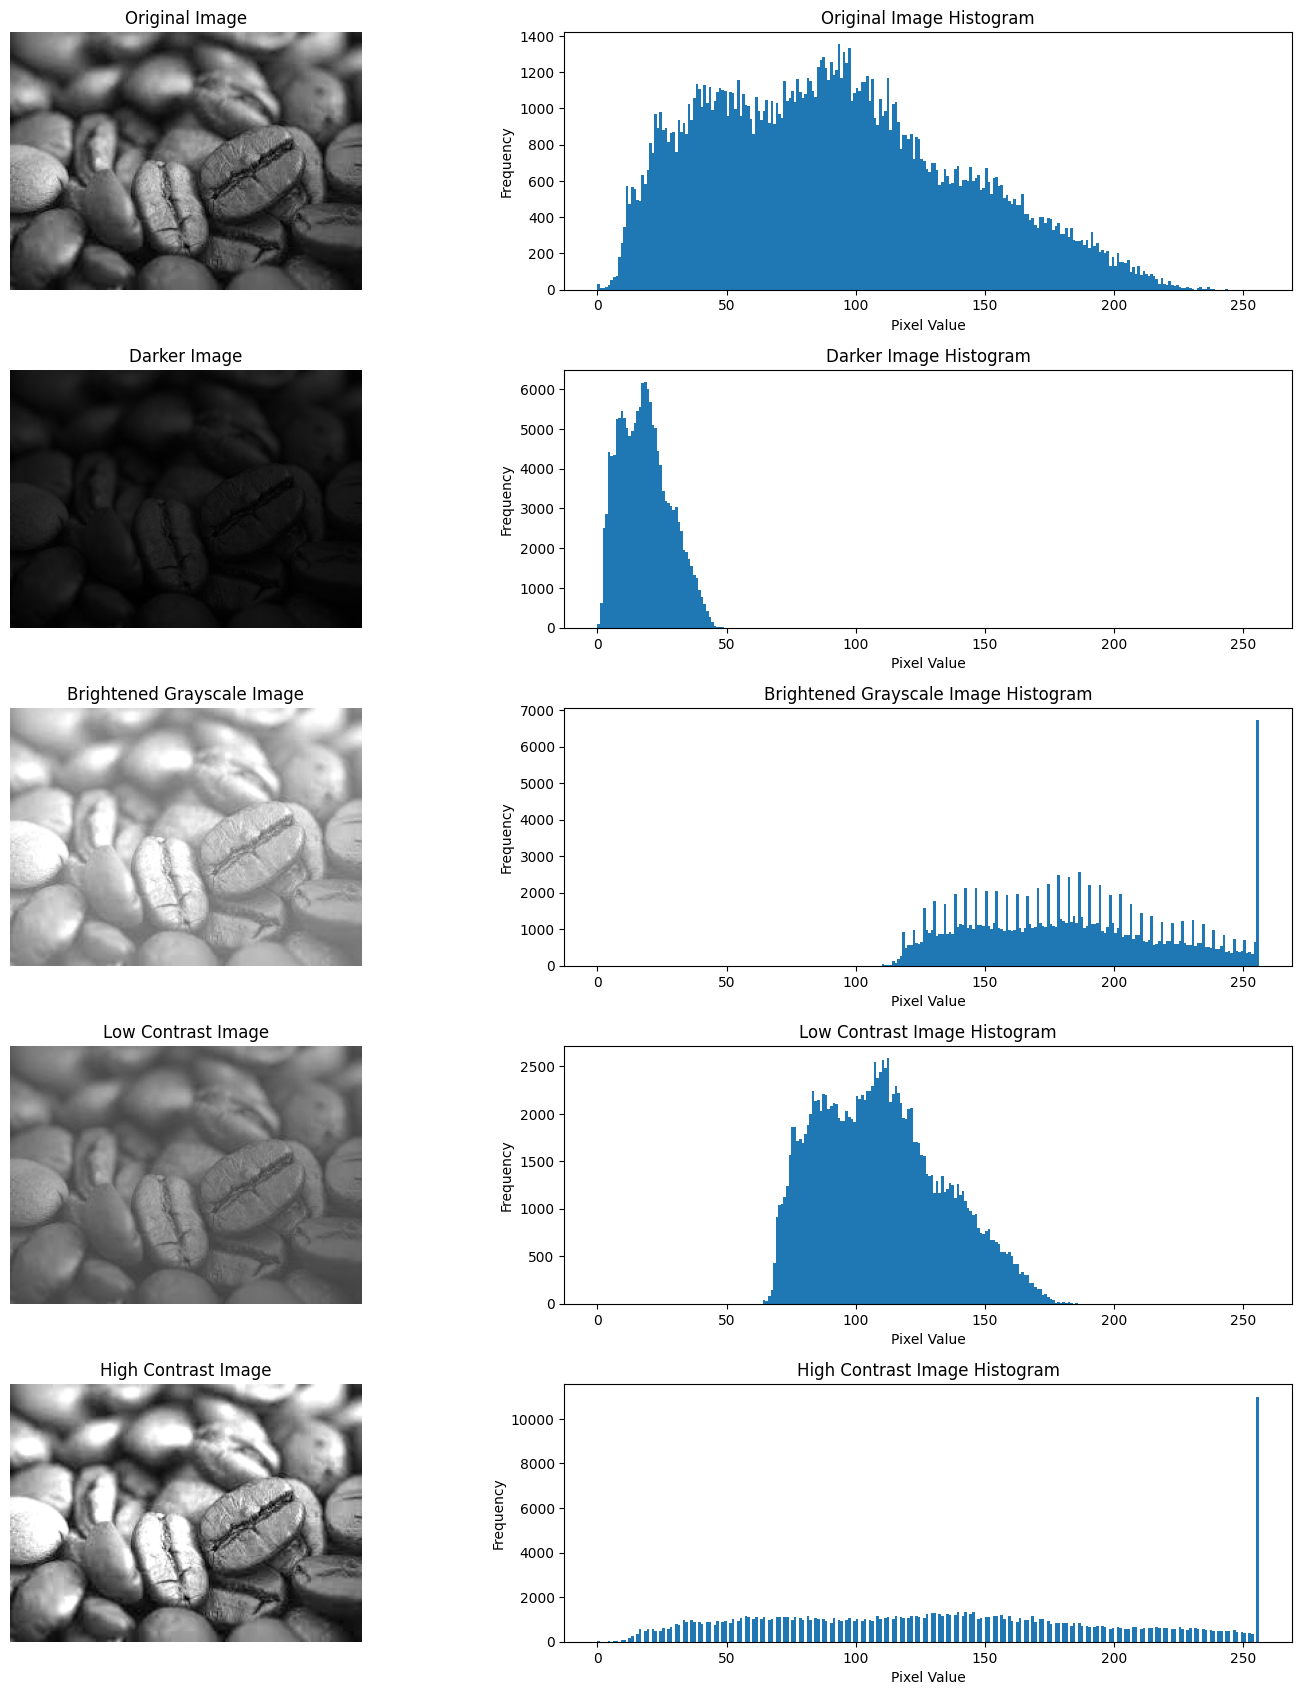

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to reduce image contrast
def reduce_contrast(img, alpha):
    img = img.astype(np.float32)
    img = alpha * img + (1 - alpha) * 128
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img

# Function to increase image contrast
def increase_contrast(img, alpha, beta):
    img = img.astype(np.float32)
    img = alpha * img + beta
    img = np.clip(img, 0, 255).astype(np.uint8)
    return img


def increase_lightness(img, alpha, beta):
  # Convert to float32 to prevent overflow
  img = img.astype(np.float32)
  # Apply linear transformation
  img = alpha * img + beta
  # Clip values to [0, 255]
  img = np.clip(img, 0, 255)
  # Convert back to uint8
  img = img.astype(np.uint8)
  return img

# Function to plot histogram
def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

# Load the original image
img = cv2.imread('c2.jpeg')

# Darker image
factor = 0.2
darker_image = np.clip(img.astype('float32') * factor, 0, 255).astype('uint8')

# Contrast stretching in grayscale
image_gray = cv2.imread('c2.jpeg', cv2.IMREAD_GRAYSCALE)
min_in, max_in = np.min(image_gray), np.max(image_gray)
contrast_stretched = np.clip(((image_gray - min_in) / (max_in - min_in)) * 255, 0, 255).astype(np.uint8)

# Increase brightness
bright_image = increase_lightness(img, 0.8, 110)

# Low contrast image
low_contrast_img = reduce_contrast(img, 0.5)

# High contrast image
high_contrast_img = increase_contrast(img, 1.5, 0)

# Display all images with histograms
plt.figure(figsize=(15, 20))

# Original image and histogram
plt.subplot(6, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(6, 2, 2)
plot_histogram(img, 'Original Image Histogram')

# Darker image and histogram
plt.subplot(6, 2, 3)
plt.title('Darker Image')
plt.imshow(cv2.cvtColor(darker_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(6, 2, 4)
plot_histogram(darker_image, 'Darker Image Histogram')

# Brightened grayscale image and histogram
plt.subplot(6, 2, 5)
plt.title('Brightened Grayscale Image')
plt.imshow(bright_image, cmap='gray')
plt.axis('off')
plt.subplot(6, 2, 6)
plot_histogram(bright_image, 'Brightened Grayscale Image Histogram')

# Low contrast image and histogram
plt.subplot(6, 2, 7)
plt.title('Low Contrast Image')
plt.imshow(cv2.cvtColor(low_contrast_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(6, 2, 8)
plot_histogram(low_contrast_img, 'Low Contrast Image Histogram')

# High contrast image and histogram
plt.subplot(6, 2, 9)
plt.title('High Contrast Image')
plt.imshow(cv2.cvtColor(high_contrast_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(6, 2, 10)
plot_histogram(high_contrast_img, 'High Contrast Image Histogram')

plt.tight_layout()
plt.show()


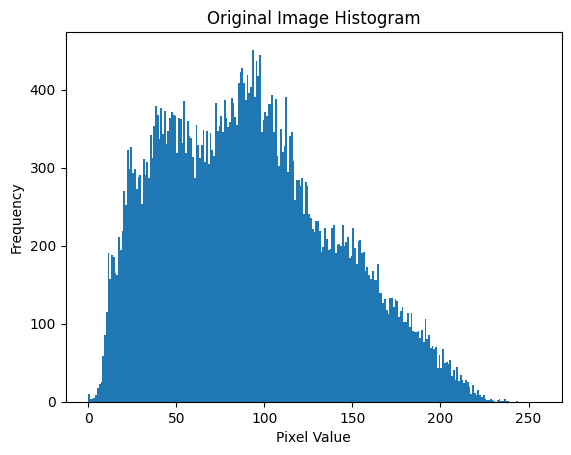

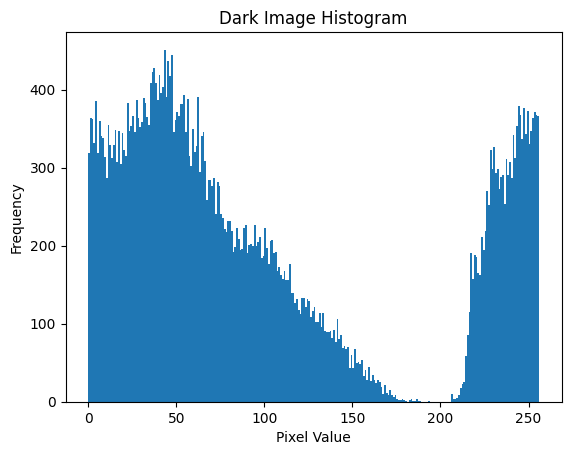

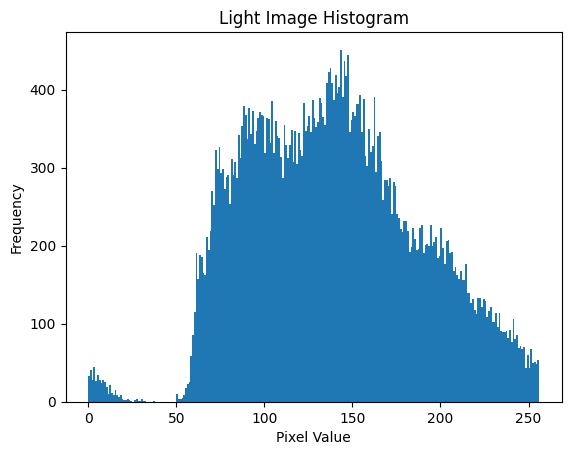

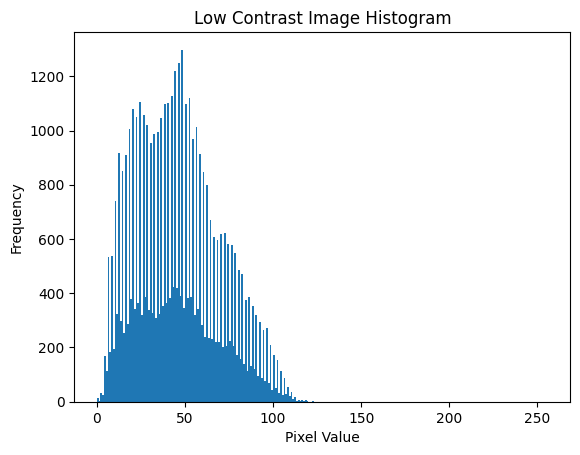

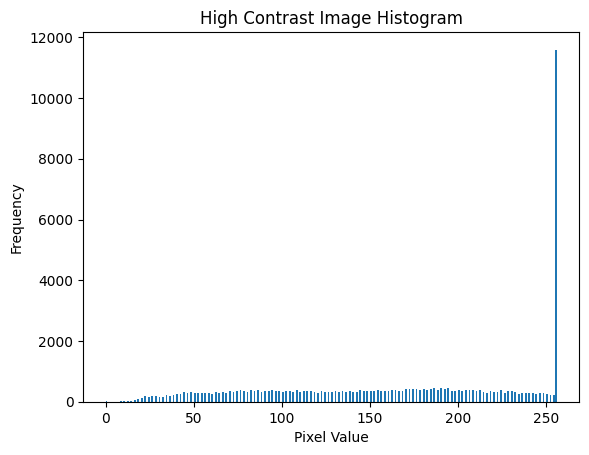

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def plot_histogram(image, title):
 plt.title(title)
 plt.xlabel('Pixel Value')
 plt.ylabel('Frequency')
 plt.hist(image.ravel(), bins=256, range=[0, 256])
 plt.show()

image = cv2.imread('c2.jpeg', cv2.IMREAD_GRAYSCALE)
plot_histogram(image, 'Original Image Histogram')

dark_image = np.clip(image - 50, 0, 255)
plot_histogram(dark_image, 'Dark Image Histogram')

light_image = np.clip(image + 50, 0, 255)
plot_histogram(light_image, 'Light Image Histogram')

low_contrast_image = cv2.convertScaleAbs(image, alpha=0.5, beta=0)
plot_histogram(low_contrast_image, 'Low Contrast Image Histogram')

high_contrast_image = cv2.convertScaleAbs(image, alpha=2, beta=0)
plot_histogram(high_contrast_image, 'High Contrast Image Histogram')

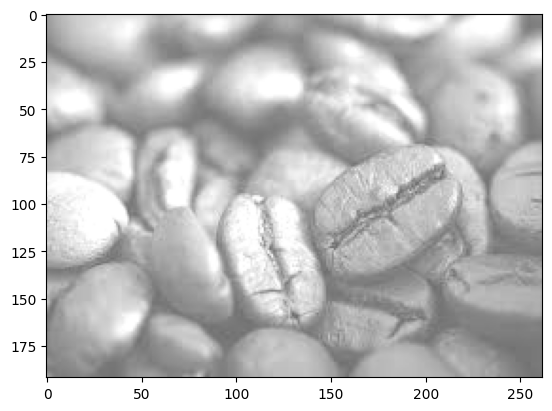

In [43]:
import cv2
import numpy as np

def increase_lightness(img, alpha, beta):
  """Increases image lightness.

  Args:
    img: Input image.
    alpha: Contrast scaling factor (0 < alpha < 1).
    beta: Brightness adjustment (beta > 0).

  Returns:
    Light contrast image.
  """

  # Convert to float32 to prevent overflow
  img = img.astype(np.float32)
  # Apply linear transformation
  img = alpha * img + beta
  # Clip values to [0, 255]
  img = np.clip(img, 0, 255)
  # Convert back to uint8
  img = img.astype(np.uint8)
  return img

# Load image
img = cv2.imread('c2.jpeg')

# Increase lightness (adjust alpha and beta for desired effect)
light_contrast_img = increase_lightness(img, 0.8, 110)

# Display images
# cv2.imshow('Original', img)
# cv2.imshow('Light Contrast', light_contrast_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(light_contrast_img)


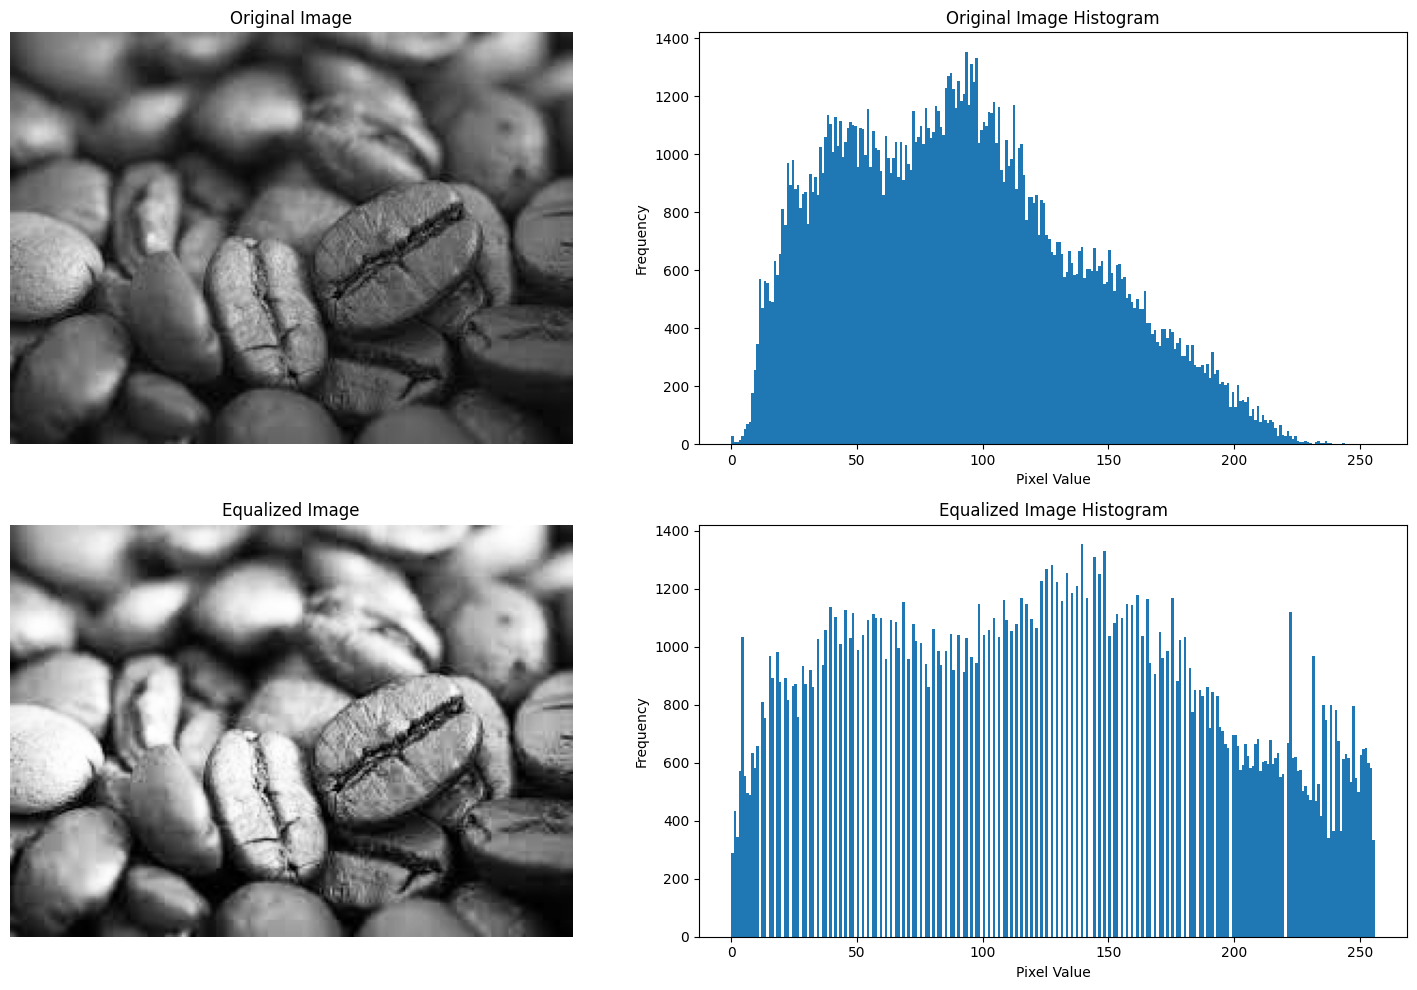

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(img):
    """Performs histogram equalization on an image.

    Args:
        img: Input image.

    Returns:
        Equalized image.
    """
    # Convert to grayscale if the image is in color
    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img

    # Apply histogram equalization
    equalized_img = cv2.equalizeHist(img_gray)

    # Convert back to original color space if necessary
    if len(img.shape) == 3:
        equalized_img = cv2.cvtColor(equalized_img, cv2.COLOR_GRAY2BGR)

    return equalized_img

def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

# Load image
img = cv2.imread('c2.jpeg')

# Perform histogram equalization
equalized_img = histogram_equalization(img)

# Display images and histograms
plt.figure(figsize=(15, 10))

# Original image and histogram
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(2, 2, 2)
plot_histogram(img, 'Original Image Histogram')

# Equalized image and histogram
plt.subplot(2, 2, 3)
plt.title('Equalized Image')
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.subplot(2, 2, 4)
plot_histogram(equalized_img, 'Equalized Image Histogram')

plt.tight_layout()
plt.show()


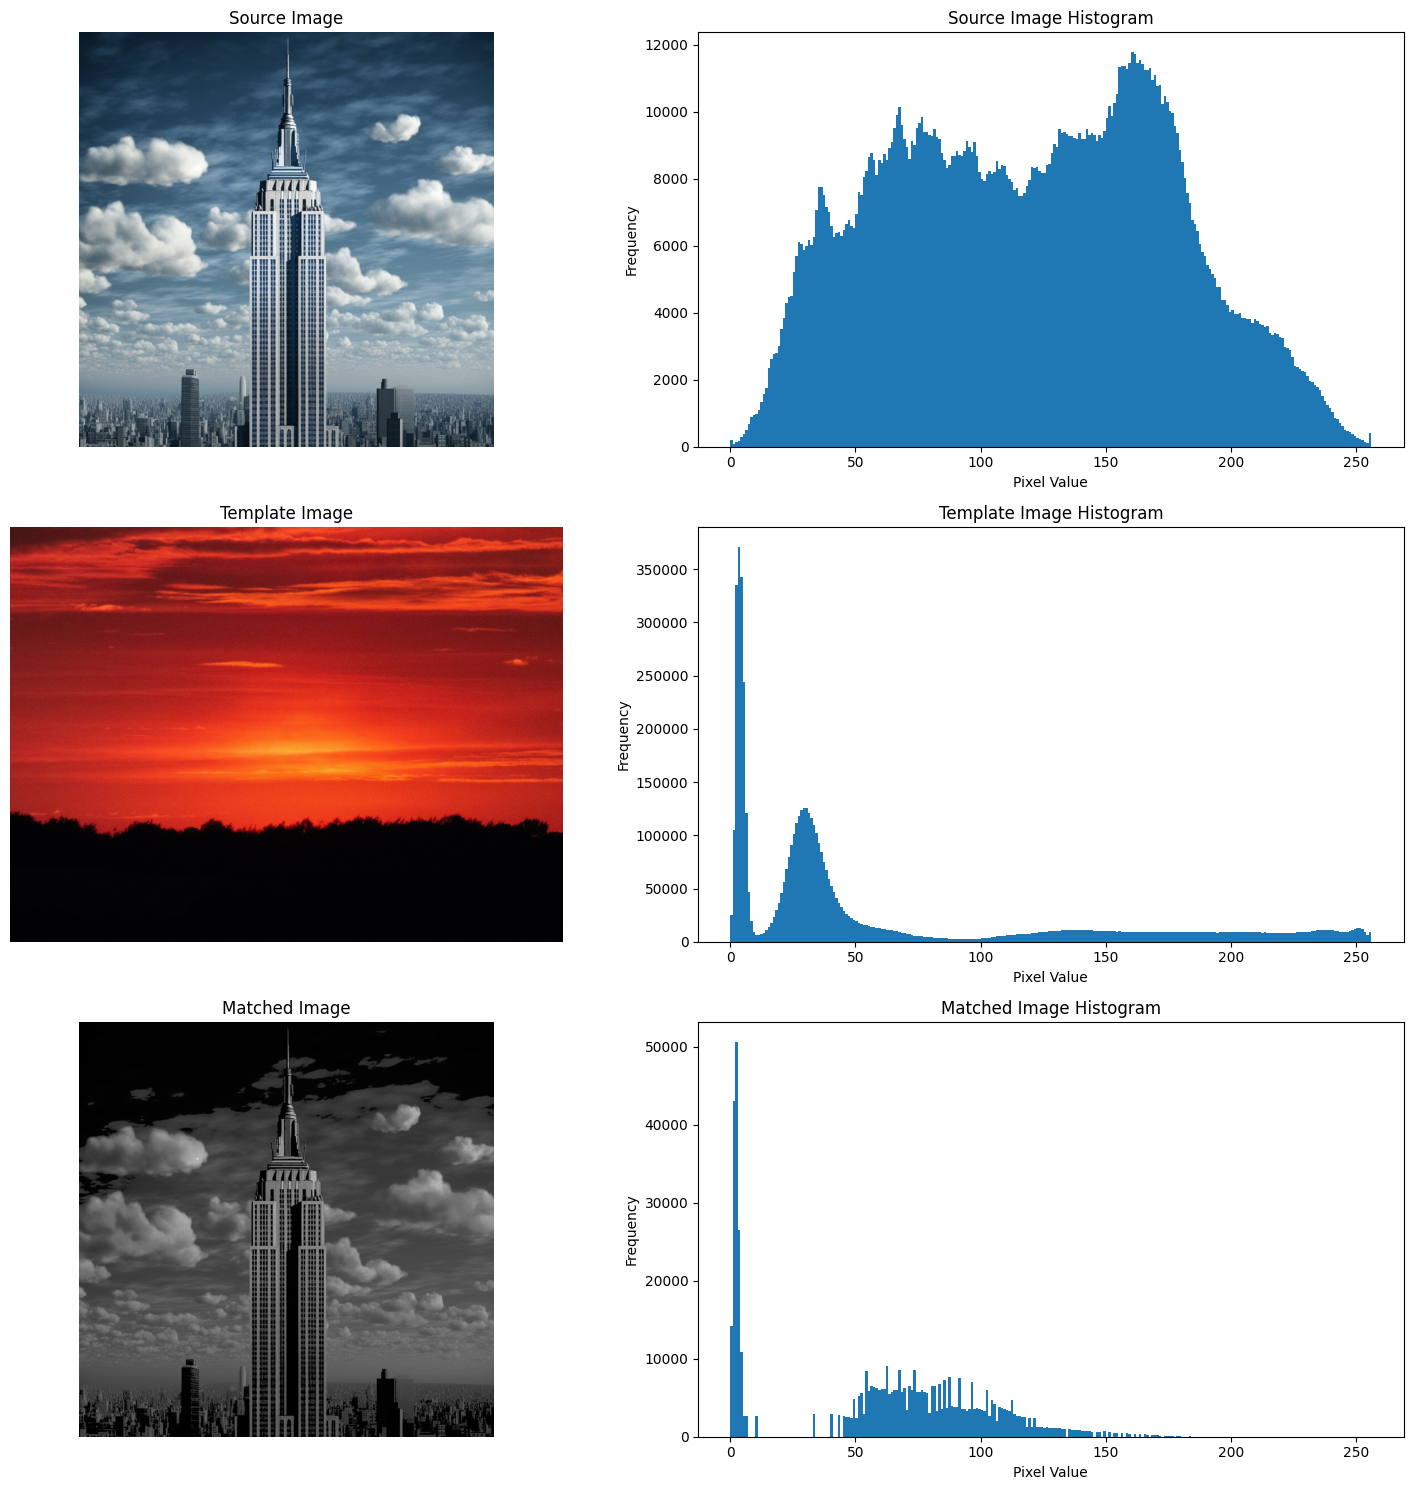

In [56]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_match(source, template):
    """Matches the histogram of a source image to a template image.

    Args:
        source: The source image.
        template: The template image.

    Returns:
        The histogram-matched image.
    """
    # Convert to grayscale if necessary
    if len(source.shape) == 3:
        source = cv2.cvtColor(source, cv2.COLOR_BGR2GRAY)
    if len(template.shape) == 3:
        template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # Calculate the histograms
    source_hist, bins = np.histogram(source.flatten(), 256, [0, 256])
    template_hist, bins = np.histogram(template.flatten(), 256, [0, 256])

    # Calculate the cumulative distribution functions (CDFs)
    cdf_source = np.cumsum(source_hist)
    cdf_template = np.cumsum(template_hist)

    # Normalize the CDFs
    cdf_source = cdf_source / cdf_source[-1]
    cdf_template = cdf_template / cdf_template[-1]

    # Create a lookup table for mapping pixel values
    mapping = np.interp(cdf_source, cdf_template, range(256))

    # Apply the mapping to the source image
    matched_image = np.interp(source.flatten(), range(256), mapping)
    matched_image = matched_image.reshape(source.shape).astype(np.uint8)

    return matched_image

def plot_histogram(image, title):
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title(title)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

# Load images
source_image_path = 'tower.jpg'
template_image_path = 'sky.jpeg'

source_image = cv2.imread(source_image_path)
template_image = cv2.imread(template_image_path)

# Check if images are loaded properly
if source_image is None:
    print(f"Error: Could not load source image from {source_image_path}")
if template_image is None:
    print(f"Error: Could not load template image from {template_image_path}")

# Perform histogram matching if images are loaded
if source_image is not None and template_image is not None:
    matched_image = histogram_match(source_image, template_image)

    # Display images and histograms
    plt.figure(figsize=(15, 15))

    # Source image and histogram
    plt.subplot(3, 2, 1)
    plt.title('Source Image')
    plt.imshow(cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(3, 2, 2)
    plot_histogram(source_image, 'Source Image Histogram')

    # Template image and histogram
    plt.subplot(3, 2, 3)
    plt.title('Template Image')
    plt.imshow(cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.subplot(3, 2, 4)
    plot_histogram(template_image, 'Template Image Histogram')

    # Matched image and histogram
    plt.subplot(3, 2, 5)
    plt.title('Matched Image')
    plt.imshow(matched_image, cmap='gray')
    plt.axis('off')
    plt.subplot(3, 2, 6)
    plot_histogram(matched_image, 'Matched Image Histogram')

    plt.tight_layout()
    plt.show()


(-0.5, 224.5, 224.5, -0.5)

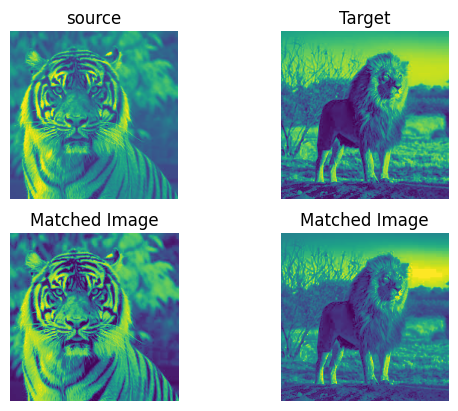

In [5]:
import cv2
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

source = cv2.imread('tiger.jpeg', cv2.IMREAD_GRAYSCALE)
target = cv2.imread('lion.jpeg', cv2.IMREAD_GRAYSCALE)


matched_image1 = exposure.match_histograms(source, target, channel_axis=None)
matched_image2 = exposure.match_histograms(target, source, channel_axis=None)

plt.subplot(2,2,1)
plt.imshow(source)
plt.title('source')
plt.axis(False)

plt.subplot(2,2,2)
plt.imshow(target)
plt.title('Target')
plt.axis(False)

plt.subplot(2,2,3)
plt.imshow(matched_image1)
plt.title('Matched Image')
plt.axis(False)

plt.subplot(2,2,4)
plt.imshow(matched_image2)
plt.title('Matched Image')
plt.axis(False)

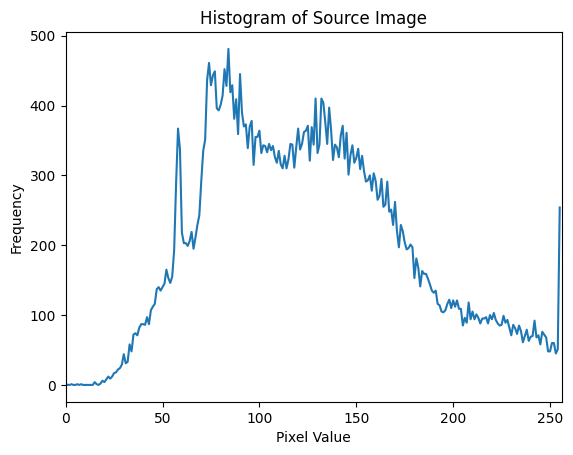

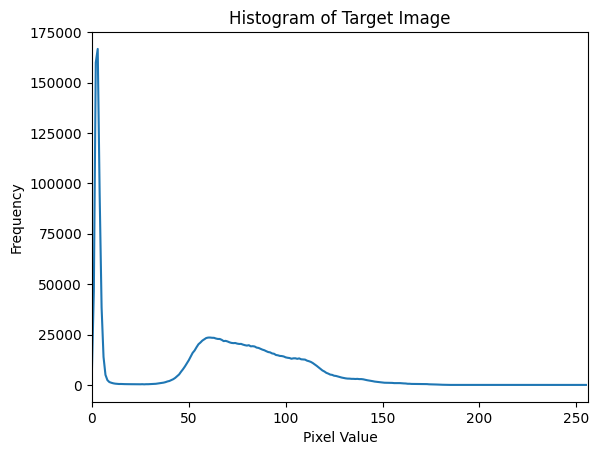

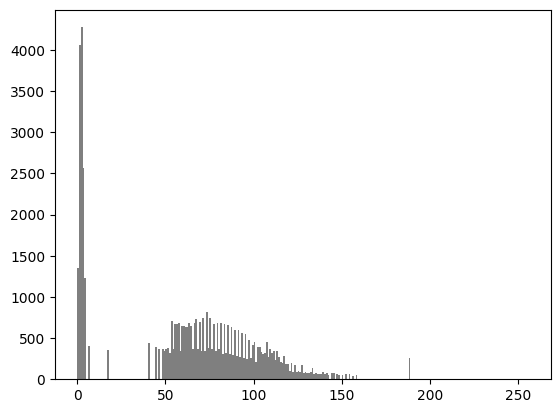

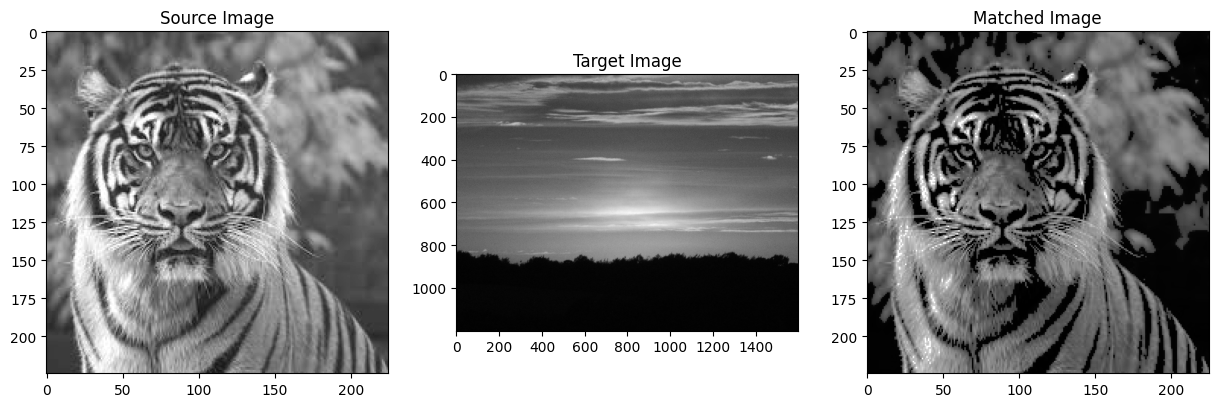

In [3]:
import cv2
from skimage.exposure import match_histograms
import numpy as np
from matplotlib import pyplot as plt

def plot_histogram(image, title):

    plt.figure()
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()



source_img = cv2.imread('tiger.jpeg', 0)
target_img = cv2.imread('sky.jpeg', 0)

matched_img = match_histograms(source_img, target_img)

plot_histogram(source_img, 'Histogram of Source Image')
plot_histogram(target_img, 'Histogram of Target Image')

plt.hist(matched_img.ravel(), bins = 256, range = (0, 256), color = 'black', alpha = 0.5)

plt.figure(figsize=(15,5))

plt.subplot(1,3,1), plt.imshow(source_img, cmap='gray'), plt.title('Source Image')
plt.subplot(1,3,2), plt.imshow(target_img, cmap='gray'), plt.title('Target Image')
plt.subplot(1,3,3), plt.imshow(matched_img, cmap='gray'), plt.title('Matched Image')

plt.show()
